Loading latent vectors

In [ ]:
import numpy as np

In [ ]:
with open('/content/drive/MyDrive/Colab_datasets/new_experiment/dcgan_latent_vectors.npy', 'rb') as f:
    dcgan_vects = np.load(f)

dcgan_vects.shape

(5000, 512)

In [ ]:
with open('/content/drive/MyDrive/Colab_datasets/new_experiment/ffhq_latent_vectors.npy', 'rb') as f:
    ffhq_vects = np.load(f)

ffhq_vects.shape

(5000, 512)

In [ ]:
with open('/content/drive/MyDrive/Colab_datasets/new_experiment/stylegan_latent_vectors.npy', 'rb') as f:
    stylegan_vects = np.load(f)

stylegan_vects.shape

(5000, 512)

Applying dimensionality reduction methods

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.colors as c
cmap = plt.get_cmap('rainbow', 10)

In [ ]:
def visualize(ffhq_vector, dcgan_vector, stylegan_vector):
    fig, axs = plt.subplots(2, 2, figsize=(20,20))
    axs[0, 0].scatter(ffhq_vector[:,0], ffhq_vector[:,1], c = 'b', edgecolor='black')
    axs[0, 0].set_title('Real faces')
    axs[0, 1].scatter(dcgan_vector[:,0], dcgan_vector[:,1], c = 'g', edgecolor='black')
    axs[0, 1].set_title('DCGAN')
    axs[1, 0].scatter(stylegan_vector[:,0], stylegan_vector[:,1], c = 'r', edgecolor='black')
    axs[1, 0].set_title('StyleGAN')
    axs[1, 1].scatter(ffhq_vector[:,0], ffhq_vector[:,1], c = 'b', edgecolor='black')
    axs[1, 1].scatter(dcgan_vector[:,0], dcgan_vector[:,1], c = 'g', edgecolor='black')
    axs[1, 1].scatter(stylegan_vector[:,0], stylegan_vector[:,1], c = 'r', edgecolor='black')
    axs[1, 1].set_title('All types')

In [ ]:
dcgan_vectors_encoded = TSNE(n_components=2).fit_transform(dcgan_vects)
ffhq_vectors_encoded = TSNE(n_components=2).fit_transform(ffhq_vects)
stylegan_vectors_encoded = TSNE(n_components=2).fit_transform(stylegan_vects)

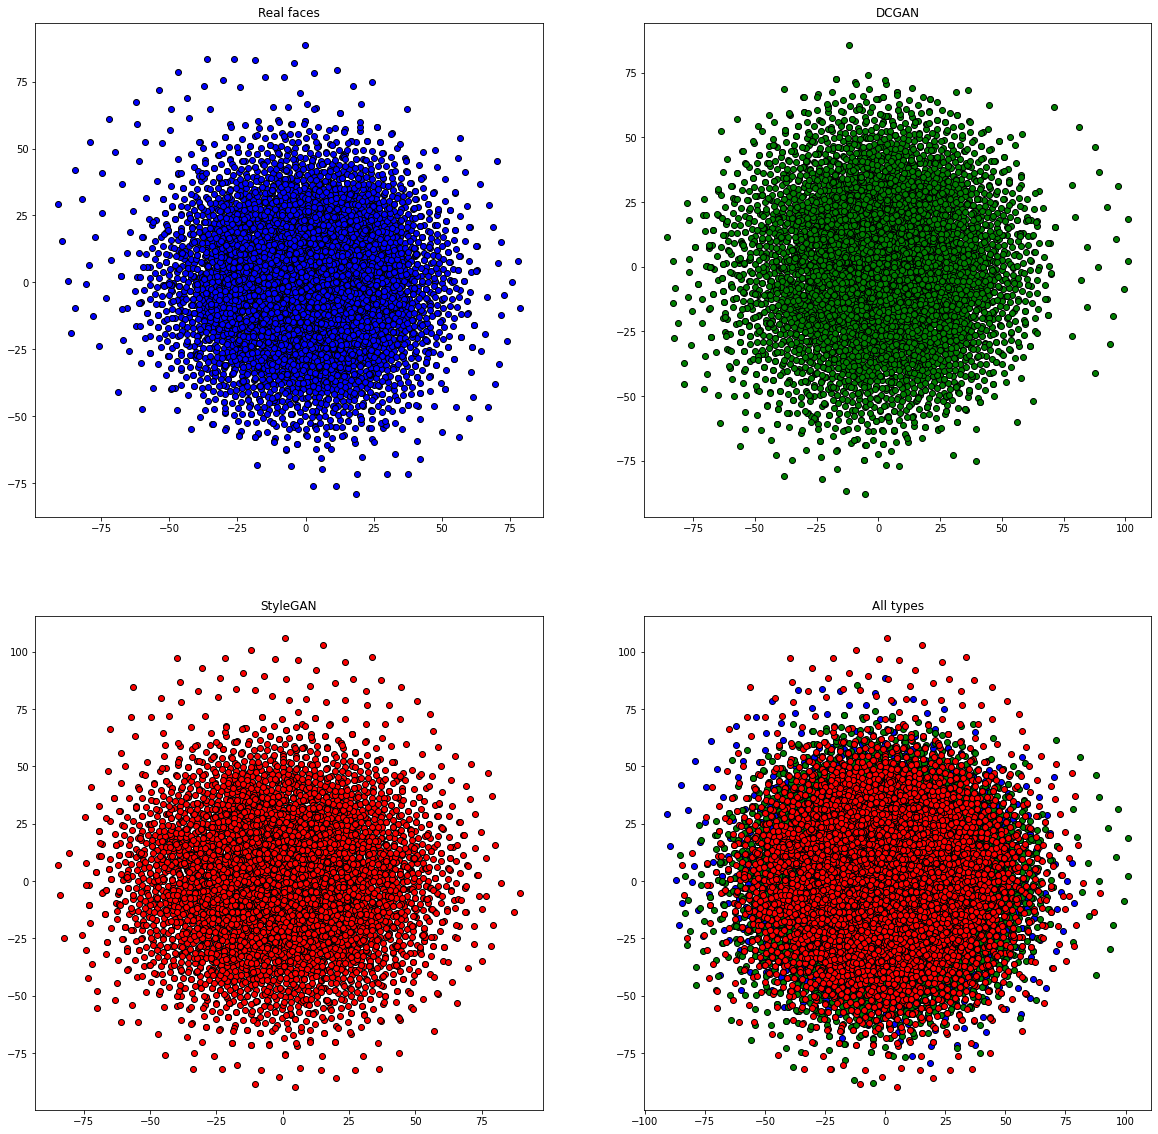

In [ ]:
visualize(ffhq_vectors_encoded, dcgan_vectors_encoded, stylegan_vectors_encoded)

In [ ]:
from sklearn.decomposition import PCA
pca_dcgan = PCA(n_components=2)
pca_ffhq = PCA(n_components=2)
pca_stylegan = PCA(n_components=2)

In [ ]:
dcgan_vectors_encoded_pca = pca_dcgan.fit_transform(dcgan_vects)
ffhq_vectors_encoded_pca = pca_ffhq.fit_transform(ffhq_vects)
stylegan_vectors_encoded_pca = pca_stylegan.fit_transform(stylegan_vects)

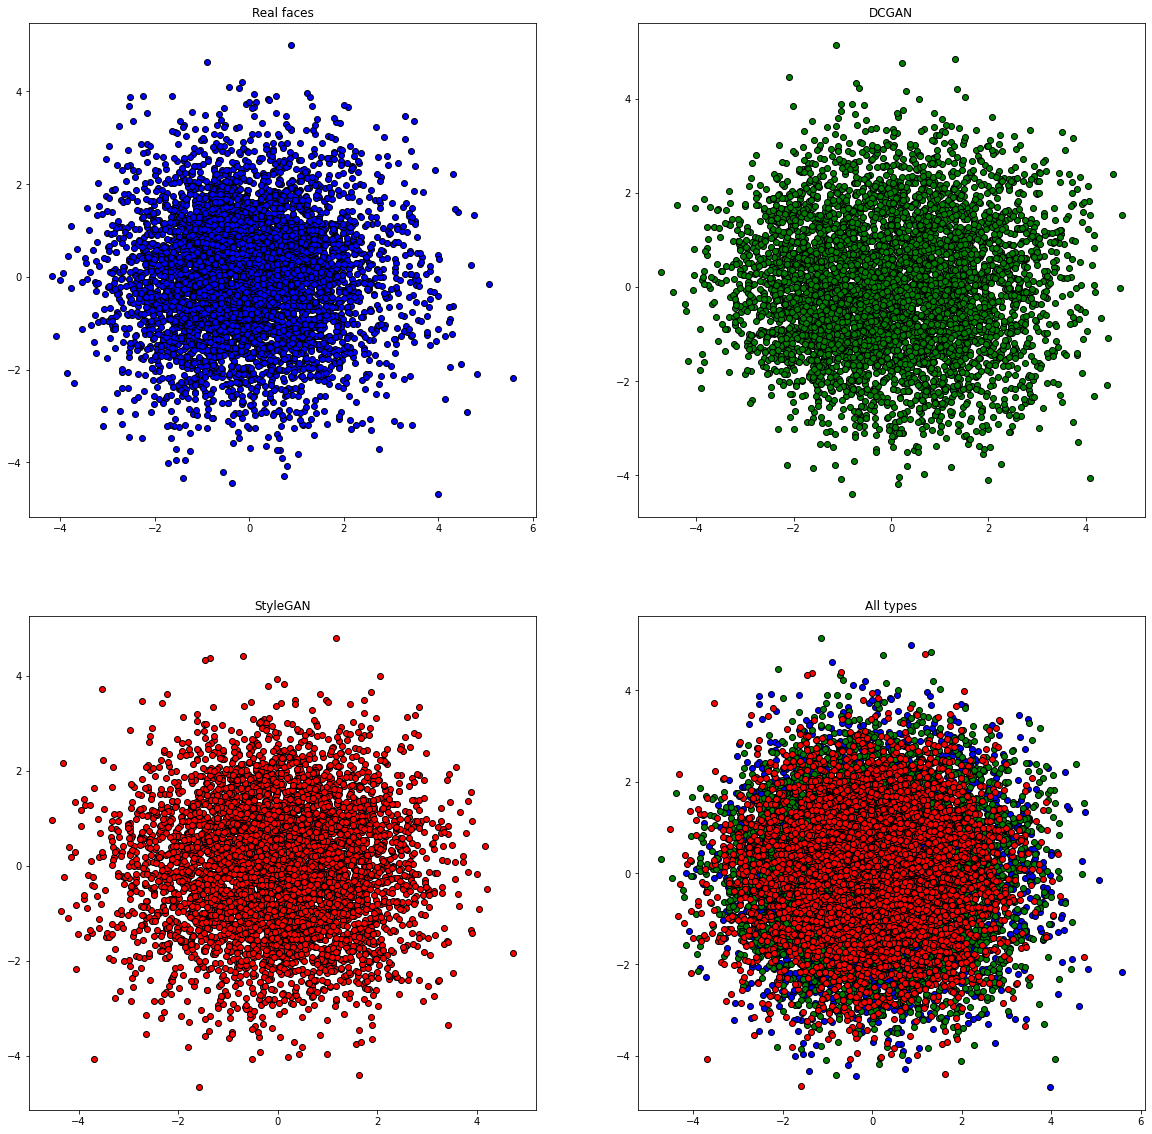

In [ ]:
visualize(ffhq_vectors_encoded_pca, dcgan_vectors_encoded_pca, stylegan_vectors_encoded_pca)

In [ ]:
from sklearn.decomposition import KernelPCA as KPCA
kpca_dcgan = KPCA(n_components=2, kernel='poly')
kpca_ffhq = KPCA(n_components=2, kernel='poly')
kpca_stylegan = KPCA(n_components=2, kernel='poly')

In [ ]:
dcgan_vectors_encoded_kpca = kpca_dcgan.fit_transform(dcgan_vects)
ffhq_vectors_encoded_kpca = kpca_ffhq.fit_transform(ffhq_vects)
stylegan_vectors_encoded_kpca = kpca_stylegan.fit_transform(stylegan_vects)

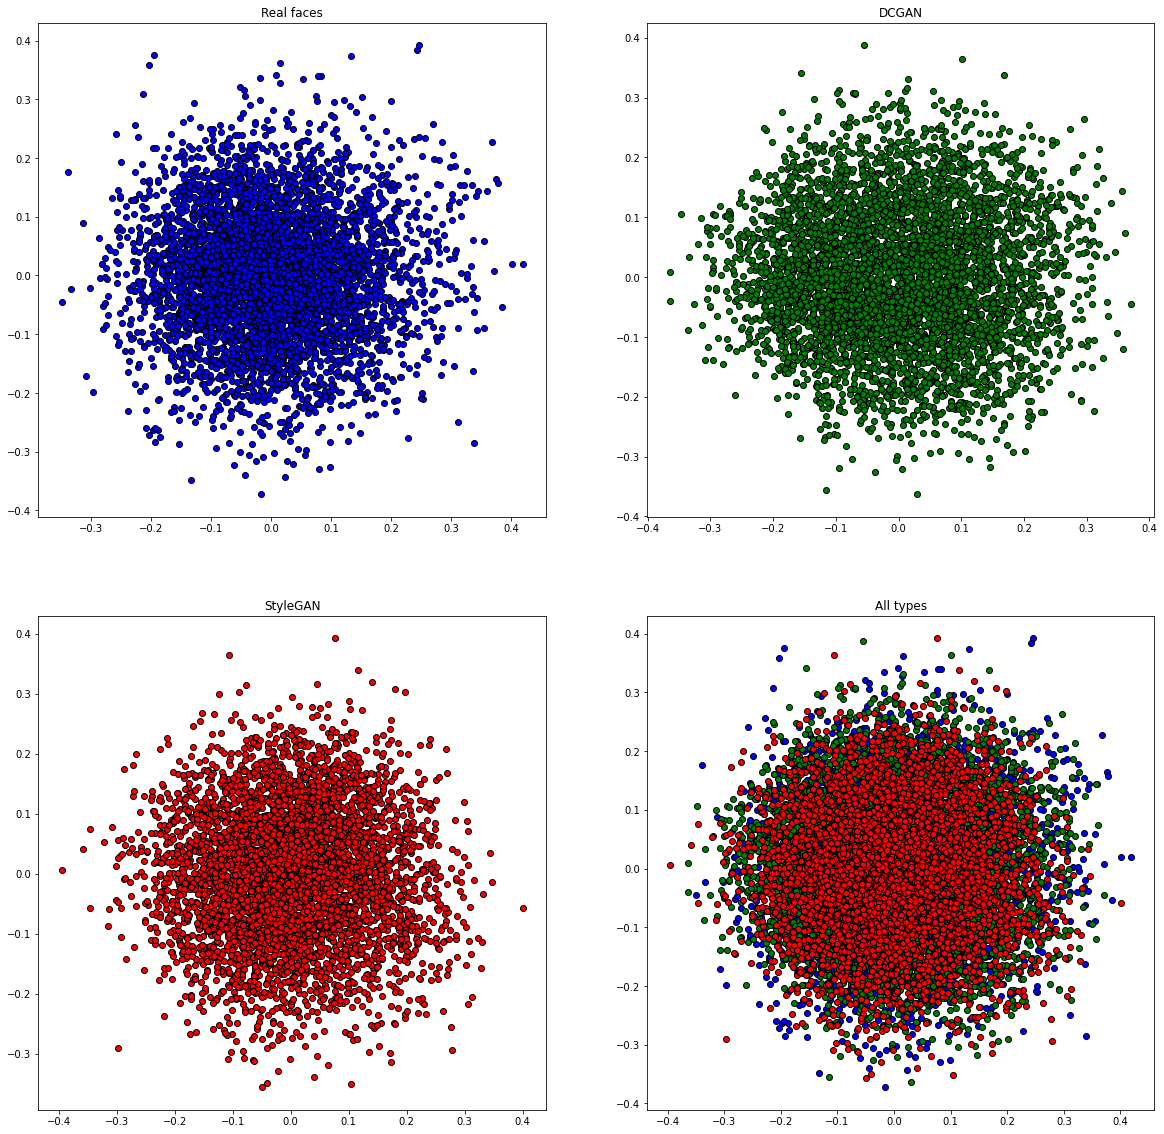

In [ ]:
visualize(ffhq_vectors_encoded_kpca, dcgan_vectors_encoded_kpca, stylegan_vectors_encoded_kpca)

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd_dcgan = TruncatedSVD(n_components = 2, n_iter = 1000)
svd_ffhq = TruncatedSVD(n_components = 2, n_iter = 1000)
svd_stylegan = TruncatedSVD(n_components = 2, n_iter = 1000)

In [ ]:
dcgan_vectors_encoded_svd = svd_dcgan.fit_transform(dcgan_vects)
ffhq_vectors_encoded_svd = svd_ffhq.fit_transform(ffhq_vects)
stylegan_vectors_encoded_svd = svd_stylegan.fit_transform(stylegan_vects)

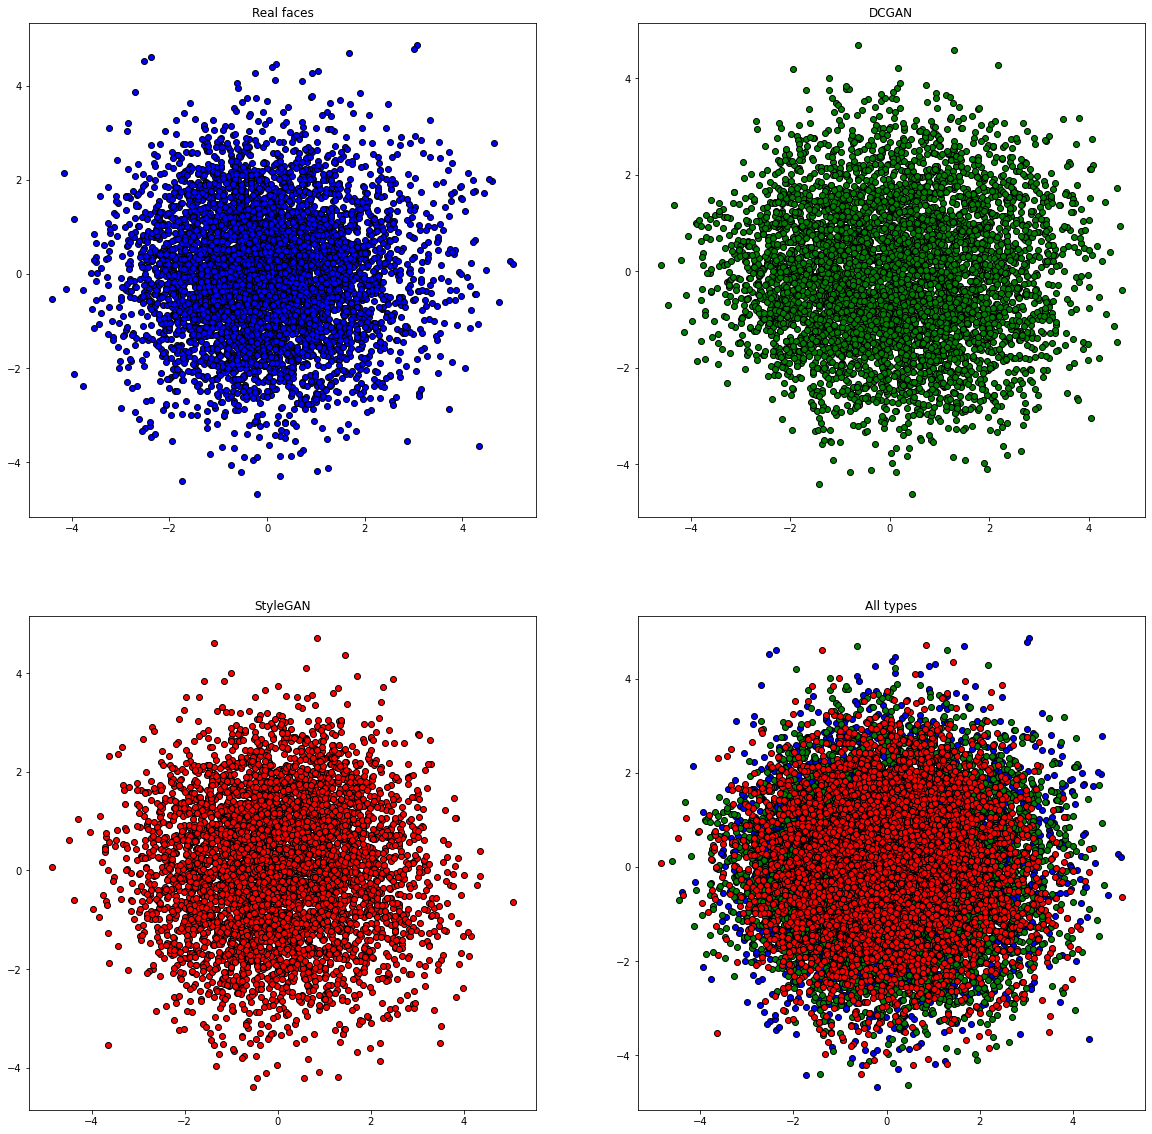

In [ ]:
visualize(ffhq_vectors_encoded_svd, dcgan_vectors_encoded_svd, stylegan_vectors_encoded_svd)